In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [3]:
df = pd.read_csv("../data/raw/telco_churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print("Shape:", df.shape)
df.info()
df.describe()

Shape: (7043, 21)
<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   s

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [6]:
df["TotalCharges"].isnull().sum()

np.int64(11)

In [7]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

/var/folders/g2/kjl_bs156y7gqhfz4qydz8k40000gn/T/ipykernel_21676/1479199042.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

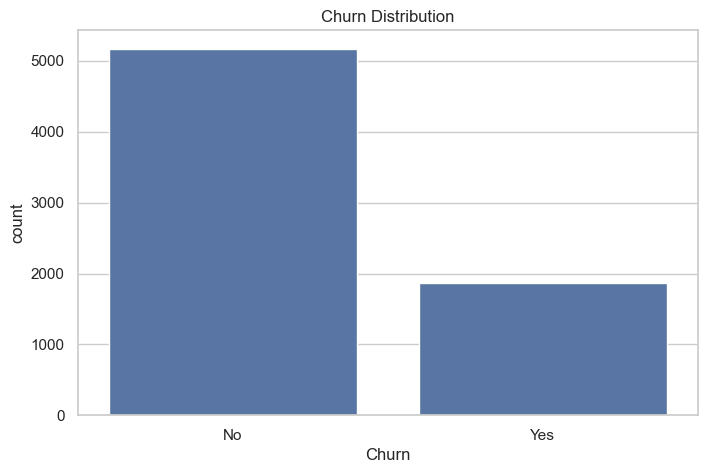

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [8]:
churn_counts = df["Churn"].value_counts()
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()
print(df["Churn"].value_counts(normalize=True))

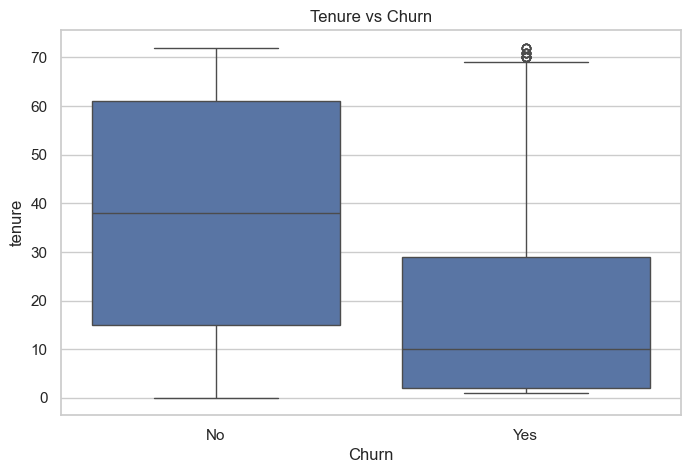

In [9]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()

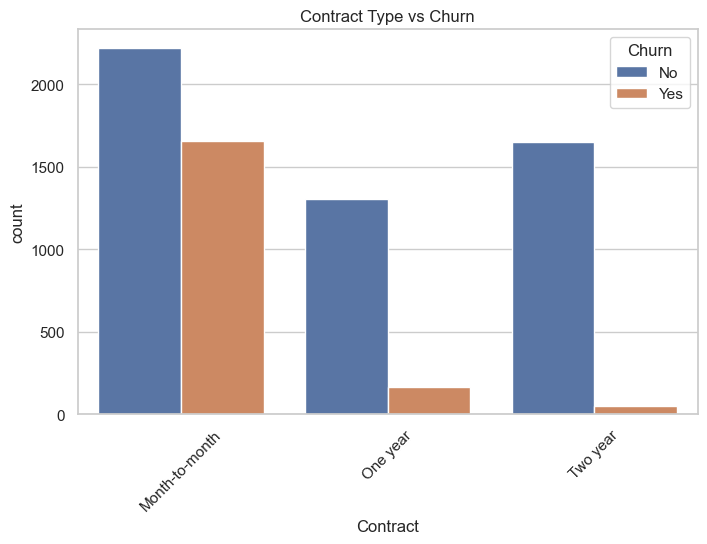

In [10]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.xticks(rotation=45)
plt.title("Contract Type vs Churn")
plt.show()

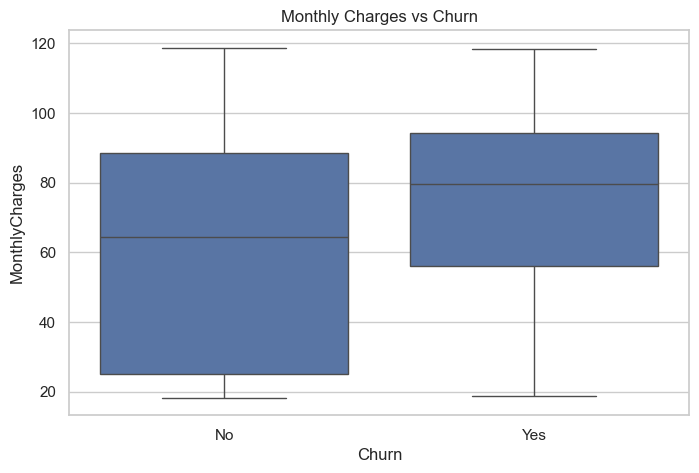

In [11]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

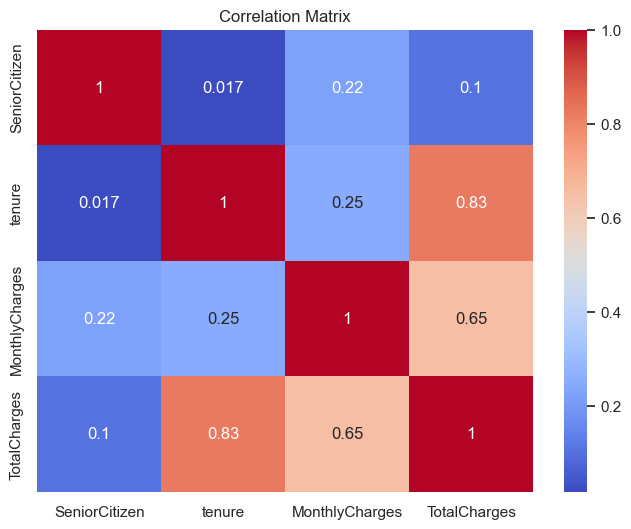

In [12]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [13]:
plt.savefig("../reports/figures/tenure_vs_churn.png")

<Figure size 800x500 with 0 Axes>

In [14]:
churn_pct = df["Churn"].value_counts(normalize=True) * 100
churn_pct

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [15]:
print(f"Churn percentage: {churn_pct['Yes']:.2f}%")

Churn percentage: 26.54%


In [16]:
contract_churn_rate = df.groupby("Contract")["Churn"].apply(lambda x: (x == "Yes").mean()).sort_values(ascending=False) * 100
contract_churn_rate

Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64

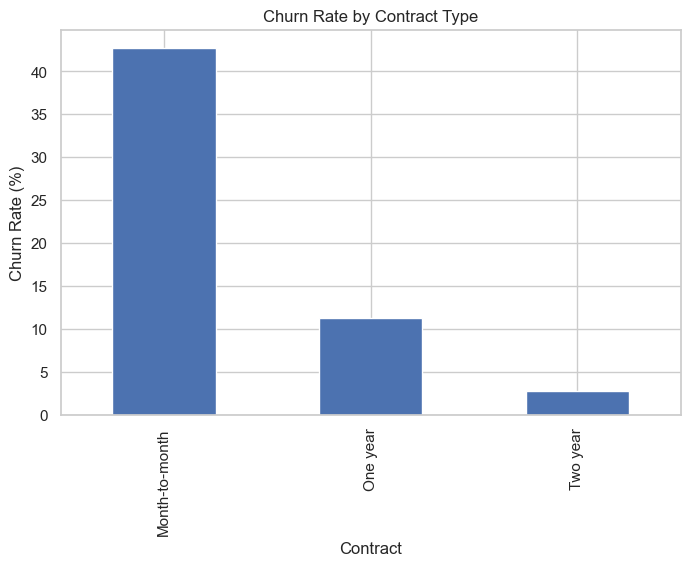

In [17]:
(contract_churn_rate).plot(kind="bar")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Contract Type")
plt.show()

In [18]:
df.groupby("Churn")["tenure"].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

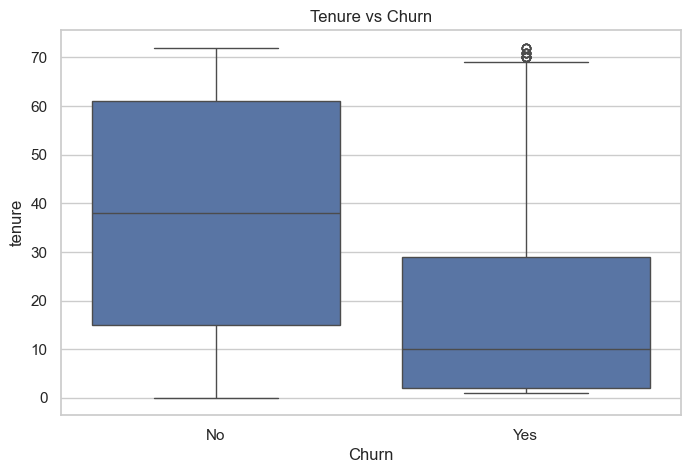

In [20]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()

In [21]:
payment_churn = df.groupby("PaymentMethod")["Churn"].apply(lambda x: (x == "Yes").mean()) * 100
payment_churn.sort_values(ascending=False)

PaymentMethod
Electronic check             45.285412
Mailed check                 19.106700
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Name: Churn, dtype: float64